# Exercise

Modify the code as per the below instructions
- Use a different dataset, such that it shows both trend and seasonality. The data can be univariate or multivariate.
- Modify the architecture, as below
    - CNN with 2 conv layers. Rest is as per our choice.
    - RNN with one layer
- Compare the results of MLP (as given), CNN and RNN.

In [ ]:
# import libraries
import numpy as np
from numpy import array
import matplotlib.pyplot as plt
from keras.layers import Conv1D, MaxPooling1D, Flatten, SimpleRNN, Dense
from keras.models import Sequential

## Transform univariate time series to supervised learning problem

In [ ]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

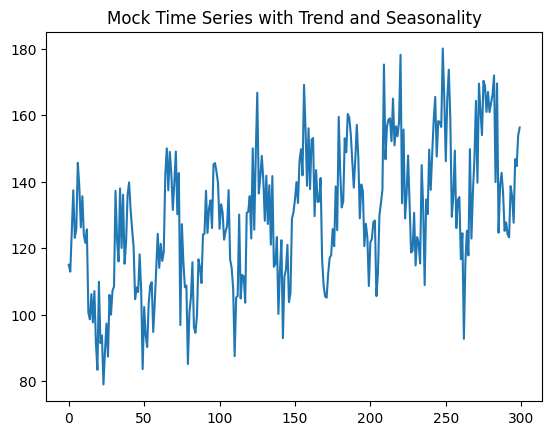

In [ ]:
# Creating a mock time series data with trend and seasonality
def create_dataset(n_points=300):
    np.random.seed(42)
    freq = 10
    noise = np.random.normal(0, 10, n_points)
    trend = np.linspace(10, 50, n_points)
    seasonality = 20 * np.sin(np.linspace(0, 2 * np.pi * freq, n_points)) + 100
    return trend + seasonality + noise

# Generate the dataset
raw_seq = create_dataset()

# Visualize the dataset
plt.plot(raw_seq)
plt.title('Mock Time Series with Trend and Seasonality')
plt.show()

In [ ]:
# Prepare the data
n_steps = 3
X, y = split_sequence(raw_seq, n_steps)
print(X.shape, y.shape)

# show each sample
for i in range(10):
    print(X[i], y[i])

(297, 3) (297,)
[114.96714153 112.92307224 124.9047651 ] 137.4213167841503
[112.92307224 124.9047651  137.42131678] 123.09391772059517
[124.9047651  137.42131678 123.09391772] 125.68295185565947
[137.42131678 123.09391772 125.68295186] 145.64174072956064
[123.09391772 125.68295186 145.64174073] 138.51125152212052
[125.68295186 145.64174073 138.51125152] 126.25390093449242
[145.64174073 138.51125152 126.25390093] 135.611404326881
[138.51125152 126.25390093 135.61140433] 123.95365278696227
[126.25390093 135.61140433 123.95365279] 121.57361590512002
[135.61140433 123.95365279 121.57361591] 125.64425979175816


## Model

In [ ]:
# MLP model
def build_mlp_model(input_shape):
    model = Sequential()
    model.add(Dense(100, activation='relu', input_dim=input_shape))
    model.add(Dense(1))
    return model

# CNN model with 2 conv layers
def build_cnn_model(input_shape):
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=1, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(filters=64, kernel_size=1, activation='relu'))
    model.add(Flatten())
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1))
    return model

# RNN model with one layer
def build_rnn_model(input_shape):
    model = Sequential()
    model.add(SimpleRNN(50, activation='relu', input_shape=input_shape))
    model.add(Dense(1))
    return model

In [ ]:
# Reshape input for CNN and RNN
cnn_rnn_X = X.reshape(X.shape[0], X.shape[1], 1)

# Define input shape for CNN and RNN
input_shape = (cnn_rnn_X.shape[1], cnn_rnn_X.shape[2])

# Define input shape for MLP
mlp_input_shape = X.shape[1]

# Reshape input for MLP
mlp_X = X.reshape(X.shape[0], X.shape[1])

# Transformation
print('Input shape for ml model: ', mlp_X.shape)
print(' Input shape for CNN & RNN model: ', cnn_rnn_X.shape)

# Build models
mlp_model = build_mlp_model(mlp_input_shape)
cnn_model = build_cnn_model(input_shape)
rnn_model = build_rnn_model(input_shape)

# Compile the models
mlp_model.compile(optimizer='adam', loss='mse')
cnn_model.compile(optimizer='adam', loss='mse')
rnn_model.compile(optimizer='adam', loss='mse')

#all model summary
print('\n')
print('mlp_model')
mlp_model.summary()
print('\n')
print('cnn_model')
cnn_model.summary()
print('\n')
print('rnn_model')
rnn_model.summary()

Input shape for ml model:  (297, 3)
 Input shape for CNN & RNN model:  (297, 3, 1)


mlp_model
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               400       
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 501 (1.96 KB)
Trainable params: 501 (1.96 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


cnn_model
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 3, 64)             128       
                                                                 
 max_pooling1d (MaxPooling1  

In [ ]:
# Training

# Fit MLP model
mlp_model.fit(mlp_X, y, epochs=200, verbose=0)

# Fit CNN model
cnn_model.fit(cnn_rnn_X, y, epochs=200, verbose=0)

# Fit RNN model
rnn_model.fit(cnn_rnn_X, y, epochs=200, verbose=0)


In [ ]:
# Predict using each model
x_input = raw_seq[-3:]
mlp_x_input = x_input.reshape((1, n_steps))
cnn_rnn_x_input = x_input.reshape((1, n_steps, 1))

mlp_prediction = mlp_model.predict(mlp_x_input, verbose=0)
cnn_prediction = cnn_model.predict(cnn_rnn_x_input, verbose=0)
rnn_prediction = rnn_model.predict(cnn_rnn_x_input, verbose=0)

# Print predictions
print(f'MLP Prediction: {mlp_prediction.flatten()}')
print(f'CNN Prediction: {cnn_prediction.flatten()}')
print(f'RNN Prediction: {rnn_prediction.flatten()}')

MLP Prediction: [151.65959]
CNN Prediction: [150.63179]
RNN Prediction: [152.32545]
